# Wafer 패턴 분류

works from https://github.com/fr407041/WM-811K_semiconductor_wafer_map_pattern_classified

data from http://mirlab.org/dataSet/public/

related kaggle competition :https://www.kaggle.com/qingyi/wm811k-wafer-map

much referenced : https://www.kaggle.com/kcs93023/keras-wafer-classification-cnn2d-with-augmentation



# 데이터 다운로드

https://www.kaggle.com/qingyi/wm811k-wafer-map 에서 다운로드 받은 archive.zip을 

google drive의 tmp 폴더에 업로드하고 시작한다.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp '/content/drive/MyDrive/tmp/archive.zip' ./

In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: LSWMD.pkl               


In [4]:
!ls -alh

total 2.1G
drwxr-xr-x 1 root root 4.0K Dec 17 04:36 .
drwxr-xr-x 1 root root 4.0K Dec 17 04:07 ..
-rw------- 1 root root 150M Dec 17 04:35 archive.zip
drwxr-xr-x 1 root root 4.0K Dec 10 17:17 .config
drwx------ 6 root root 4.0K Dec 17 04:33 drive
-rw-r--r-- 1 root root 2.0G Sep 27  2019 LSWMD.pkl
drwxr-xr-x 1 root root 4.0K Dec  2 22:04 sample_data


# 데이터 로딩

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_pickle("LSWMD.pkl")

In [7]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


# 데이터 살펴보기

## 컬럼 waferMap

In [9]:
wafer_map = df.waferMap.values
print(wafer_map[0])
print(wafer_map[0].shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(45, 48)


1개의 wafer map은 2차원 어레이이다.

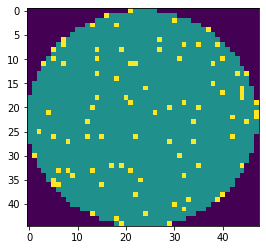

000000000000000000000211111000000000000000000000
000000000000000021111111111111100000000000000000
000000000000001111111111111111211100000000000000
000000000000121111211111111111111111000000000000
000000000011111111111111111111111111120000000000
000000000111111111111111111111111111111000000000
000000021111111111111111111211111111111100000000
000000121111111111111111111111112112111210000000
000002111111112111121111111211111111111111000000
000001111111111111111111111111111111111111100000
000012111111112111111111111111121111111121110000
000211121111111111111221111111111111112111110000
000111111111111111111111111111111111111111111000
001111111111112111111111111111111111111111121200
001111111111111111211111111111111111111111111100
011111111111111111111111111111111111112111111100
011111111111111111111111211111111111111111112110
011111111111111111111111111111111111111121112110
111111111111112111112111111111111111111111112110
111111111111111111111211111111112111111111111112
11111111111112111111

In [10]:
plt.imshow(wafer_map[0])
plt.show()
for i in range(45):
  for j in range(48):
    print(wafer_map[0][i][j], end='')
  print()

배경은 0이고, wafer는 1과 2로 구분된다.

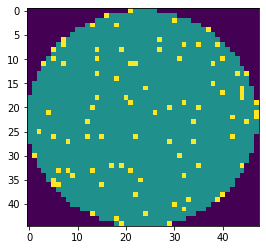

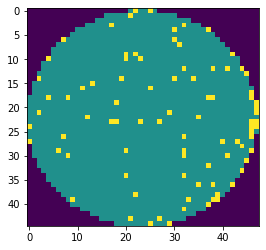

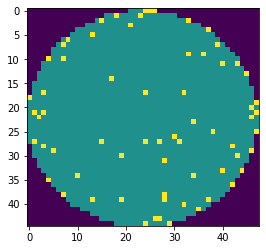

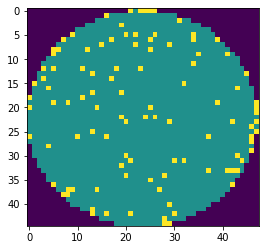

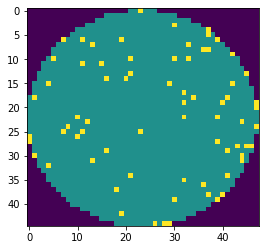

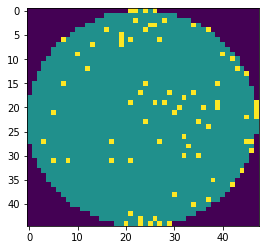

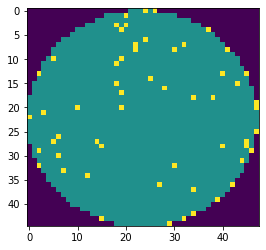

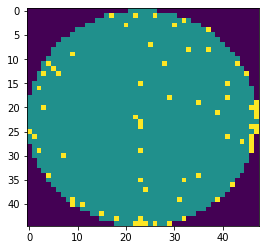

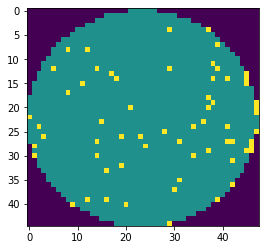

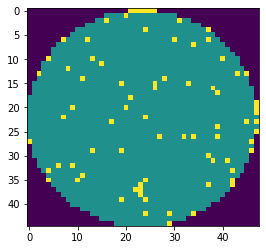

In [11]:
for i in range(10):
  plt.imshow(wafer_map[i])
  plt.show()

In [12]:
def find_shape(x):
  return x.shape

df['waferMapShape']=df.waferMap.apply(find_shape)
df.sample(5)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapShape
334911,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...",1091.0,lot20178,14.0,[],[],"(37, 37)"
295473,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2628.0,lot18063,4.0,[],[],"(57, 58)"
93575,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",682.0,lot6622,20.0,[],[],"(31, 28)"
687167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1233.0,lot42502,17.0,[[Test]],[[none]],"(41, 38)"
413655,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3008.0,lot24609,23.0,[],[],"(57, 67)"


In [13]:
shape_count = np.unique(df.waferMapShape, return_counts=True)
print(shape_count)

(array([(6, 21), (10, 11), (10, 12), (10, 150), (11, 11), (12, 12),
       (12, 27), (13, 76), (14, 12), (14, 13), (15, 3), (15, 15), (18, 4),
       (18, 19), (18, 28), (18, 44), (18, 45), (18, 48), (18, 65),
       (19, 26), (20, 19), (21, 17), (21, 23), (21, 24), (22, 26),
       (22, 35), (22, 50), (23, 33), (23, 34), (24, 13), (24, 18),
       (24, 42), (24, 71), (25, 26), (25, 27), (25, 28), (25, 29),
       (26, 25), (26, 26), (26, 28), (26, 29), (26, 30), (26, 32),
       (26, 44), (26, 50), (27, 15), (27, 25), (27, 27), (27, 28),
       (27, 30), (27, 31), (27, 33), (27, 71), (28, 26), (28, 28),
       (28, 29), (28, 30), (28, 35), (28, 42), (28, 45), (28, 51),
       (28, 71), (28, 76), (29, 24), (29, 26), (29, 27), (29, 28),
       (29, 29), (29, 30), (29, 31), (29, 35), (29, 45), (29, 61),
       (30, 29), (30, 30), (30, 31), (30, 32), (30, 34), (30, 35),
       (30, 38), (30, 40), (31, 24), (31, 28), (31, 29), (31, 31),
       (31, 32), (31, 33), (31, 35), (32, 29), (32, 3

wafer map의 크기가 다양하다.

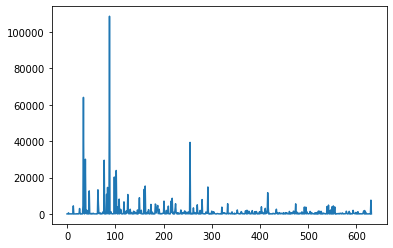

In [14]:
plt.plot(shape_count[1])
plt.show()

대부분 20,000 미만이고, 몇 개만 다수이다.

## 컬럼 dieSize

In [15]:
die_size = np.unique(df.dieSize, return_counts=True)
print(die_size)

(array([3.0000e+00, 1.2000e+01, 2.1000e+01, ..., 2.3216e+04, 4.3935e+04,
       4.8099e+04]), array([ 1,  1,  2, ..., 35,  3, 16]))


In [16]:
print(len(die_size[0]))

1266


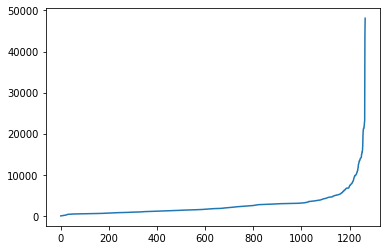

In [17]:
plt.plot(die_size[0])

대부분이 10,000보다 작은 값이고, 소수 많이 10,000 ~ 50,000의 값을 갖는다.

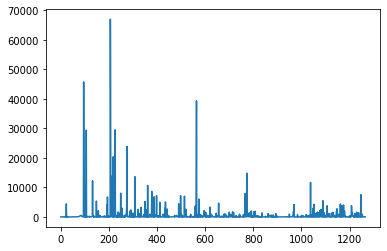

In [18]:
plt.plot(die_size[1])

5,6개만 10,000개 이상이고 대부분 10,000개 미만이다.

## 컬럼 lotName

In [19]:
lot_name = np.unique(df.lotName, return_counts=True)
print(lot_name)
print(len(lot_name[0]))

(array(['lot1', 'lot10', 'lot100', ..., 'lot9997', 'lot9998', 'lot9999'],
      dtype=object), array([25, 25, 25, ..., 23, 23, 23]))
46293


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25]), array([ 3461,  1255,   853,   737,  1279,   634,  1053,   560,  1404,
        1077,   682,  3032,  1960,   149,   246,   248,   260,   419,
         243,   336,   391,   602,   991,  2659, 21762]))


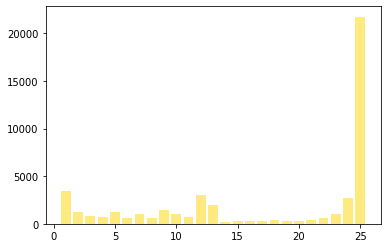

In [20]:
unique_count = np.unique(lot_name[1], return_counts=True)
print(unique_count)
plt.bar(unique_count[0], unique_count[1], color='gold', align='center', alpha=0.5)
plt.show()

25개의 같은 lot name을 갖는 것이 대부분이다.

## 컬럼 waferIndex

In [ ]:
wafer_index_count = np.unique(df.waferIndex, return_counts=True)
print(wafer_index_count)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]), array([32516, 32663, 32621, 32714, 32701, 32745, 32672, 32650, 32636,
       32586, 32637, 32598, 32381, 32353, 32301, 32362, 32333, 32333,
       32285, 32290, 32320, 32312, 32202, 32197, 32049]))


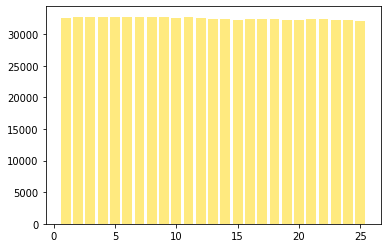

In [ ]:
plt.bar(unique_wafer_index[0], unique_wafer_index[1], color='gold', align='center', alpha=0.5)
plt.show()

wafer index는 1~25의 값이며, 그 분포가 거의 동일하다.

## 컬럼 trainTestLabel

In [ ]:
train_test_label = df.trianTestLabel.values
print(train_test_label[0])
print(train_test_label[0][0])
print(train_test_label[0][0][0])

[['Training']]
['Training']
Training


사용하지 않을 컬럼이다. 무시한다.

## 컬럼 failureType

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
 6   waferMapShape   811457 non-null  object 
dtypes: float64(2), object(5)
memory usage: 43.3+ MB


In [21]:
failure_type = df.failureType.values
print(failure_type[0])
print(failure_type[999])
print(failure_type[1111])
print(failure_type[2222])

[['none']]
[['none']]
[['none']]
[]


In [22]:
failure_name = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full', 'none']
failure_category_index = {}
for i in range(len(failure_name)):
  failure_category_index[failure_name[i]] = i
#failure_category_index = {'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}

def encode_failure_type(x):
  # x = [['Center']]
  if len(x)==0 or len(x[0])==0 : return failure_category_index['none']
  return failure_category_index[x[0][0]]

df['failureCategory']=df.failureType.apply(encode_failure_type)
df.sample(5)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,waferMapShape,failureCategory
224848,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2793.0,lot14149,21.0,[],[],"(59, 60)",8
32804,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",736.0,lot3173,6.0,[],[],"(31, 31)",8
295948,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2479.0,lot18082,17.0,[[Training]],[[Edge-Loc]],"(72, 44)",2
140204,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...",811.0,lot9106,6.0,[],[],"(34, 31)",8
665395,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",712.0,lot41440,23.0,[[Training]],[[Edge-Loc]],"(32, 29)",2


In [23]:
failure_category_count = np.unique(df.failureCategory, return_counts=True)
print(failure_category_count)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([  4294,    555,   5189,   9680,   3593,    866,   1193,    149,
       785938]))


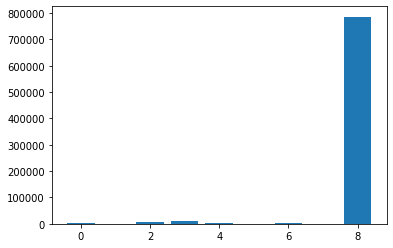

In [24]:
plt.bar(failure_category_count[0], failure_category_count[1])
plt.show()

failure type이 8('none') 인것이 대부분이다. failure가 아닌 것이다.

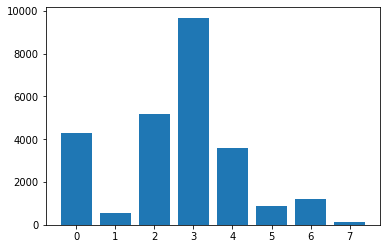

In [25]:
plt.bar(failure_category_count[0][:-1], failure_category_count[1][:-1])
plt.show()

1, 5, 6, 7이 너무 적다.

분류를 하려면 1, 5, 6, 7을 모아서 하나의 카테고리로 해야 할 듯

# 문제 정의

wafer map 영상을 입력으로 failure type을 예측한다.

학습과 검증에는 failure가 None 아닌 것만 사용한다.



In [26]:
failure_df = df[df['failureCategory']!=8]
failure_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25519 entries, 19 to 811454
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   waferMap         25519 non-null  object 
 1   dieSize          25519 non-null  float64
 2   lotName          25519 non-null  object 
 3   waferIndex       25519 non-null  float64
 4   trianTestLabel   25519 non-null  object 
 5   failureType      25519 non-null  object 
 6   waferMapShape    25519 non-null  object 
 7   failureCategory  25519 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


Center


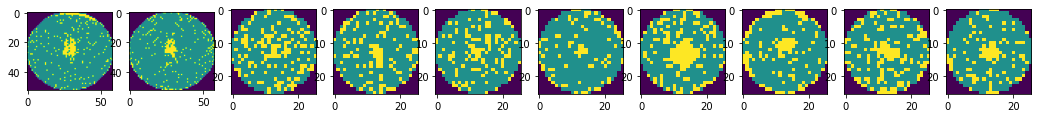

Donut


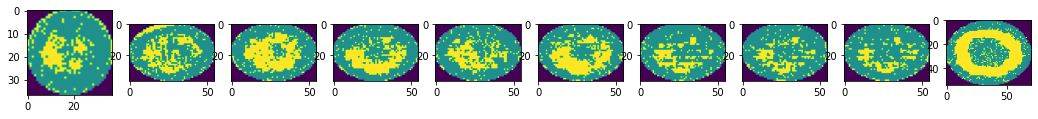

Edge-Loc


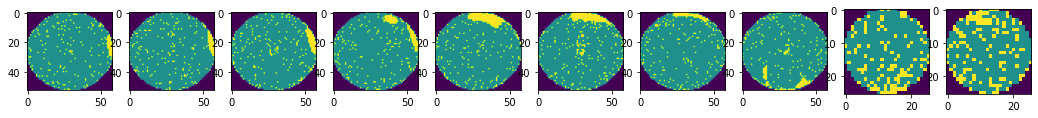

Edge-Ring


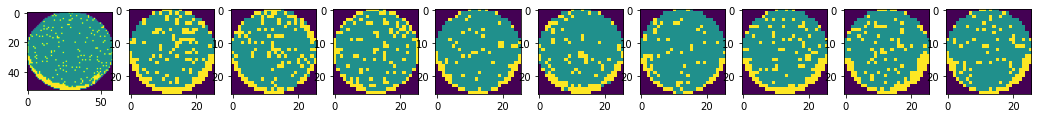

Loc


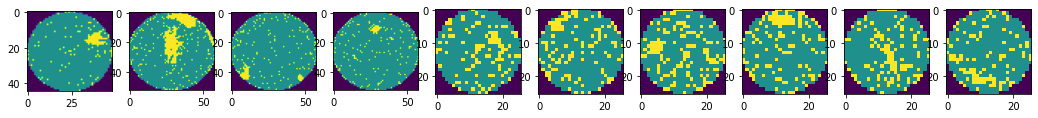

Random


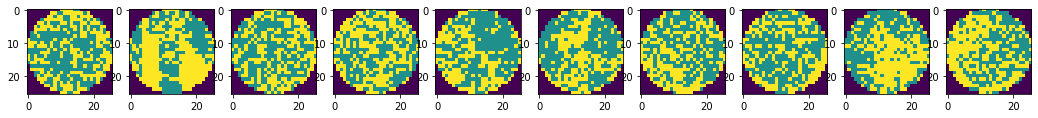

Scratch


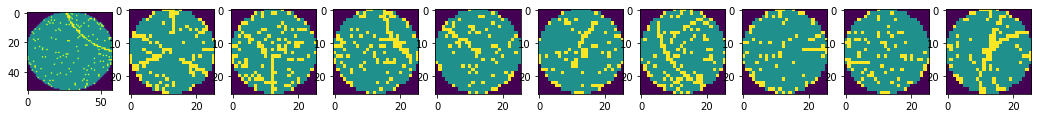

Near-full


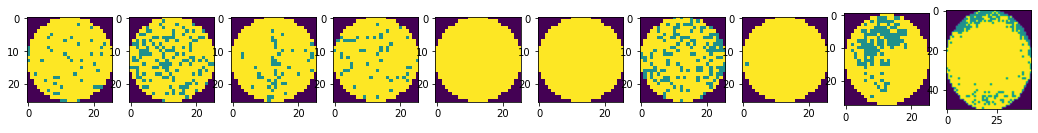

In [27]:
for i in range(len(failure_name)-1):
  fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
  sub_df = failure_df[failure_df['failureCategory']==i]
  print(failure_name[i])
  for j in range(10):
    ax[j].imshow(sub_df.iloc[j].waferMap)
  plt.show()
  

# x, y 데이터 생성

## x 데이터

In [28]:
wafer_map  = failure_df.waferMap.values

In [29]:
from skimage.transform import resize

x = np.empty((len(wafer_map), 26, 26))
for i in range(len(wafer_map)):
  normalized = wafer_map[i] / 2.0
  x[i] = resize(normalized, (26, 26))

In [30]:
 print(x.shape)

(25519, 26, 26)


In [31]:
x = np.expand_dims(x, -1)
print(x.shape)

(25519, 26, 26, 1)


In [32]:
print(np.min(x), np.max(x))

0.0 1.0000000000000004


## y 데이터

failure category 5,6,7을 1로 변환

In [34]:
def change_category(c):
  if c in [1,5,6,7]: return 1
  else: return c

failure_df['failureCategory'] = failure_df.failureCategory.apply(change_category)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


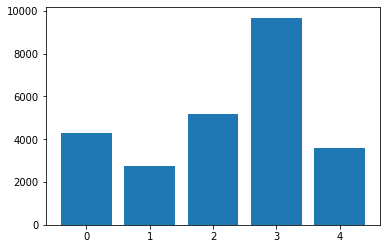

In [36]:
failure_category_count = np.unique(failure_df.failureCategory, return_counts=True)
plt.bar(failure_category_count[0], failure_category_count[1])
plt.show()

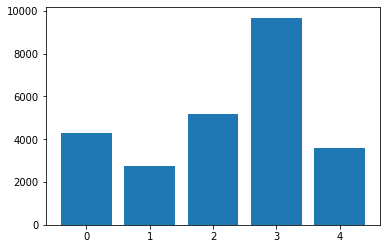

In [ ]:
failure_category_count = np.unique(failure_df.failureCategory, return_counts=True)
plt.bar(failure_category_count[0], failure_category_count[1])
plt.show()

In [37]:
y = failure_df.failureCategory.values

## train, test로 분리

In [47]:
shuffled_index = np.random.permutation(len(x))
x = x[shuffled_index]
y = y[shuffled_index]

In [48]:
split_index = int(len(x)*0.8)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

# 기본 모델

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, BatchNormalization

import time

In [43]:
print(x.shape)
print(x[0].shape)

(25519, 26, 26, 1)
(26, 26, 1)


In [45]:
print(failure_name)
print(len(failure_name))

['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random', 'Scratch', 'Near-full', 'none']
9


In [50]:
model = keras.Sequential()
model.add(Input(x[0].shape))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(failure_name)-1, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                23050     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [51]:
hist = model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1)

Epoch 1/100
144/144 [==============================] - 1s 6ms/step - loss: 1.5793 - accuracy: 0.3276 - val_loss: 1.0923 - val_accuracy: 0.5171
Epoch 2/100
144/144 [==============================] - 1s 4ms/step - loss: 0.9070 - accuracy: 0.6508 - val_loss: 0.7284 - val_accuracy: 0.7233
Epoch 3/100
144/144 [==============================] - 1s 4ms/step - loss: 0.6406 - accuracy: 0.7496 - val_loss: 0.6192 - val_accuracy: 0.7542
Epoch 4/100
144/144 [==============================] - 1s 4ms/step - loss: 0.5787 - accuracy: 0.7691 - val_loss: 0.6341 - val_accuracy: 0.7561
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 0.5335 - accuracy: 0.7874 - val_loss: 0.5566 - val_accuracy: 0.7669
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 0.5054 - accuracy: 0.7991 - val_loss: 0.5221 - val_accuracy: 0.7938
Epoch 7/100
144/144 [==============================] - 1s 4ms/step - loss: 0.4900 - accuracy: 0.8046 - val_loss: 0.4994 - val_accuracy: 0.8007

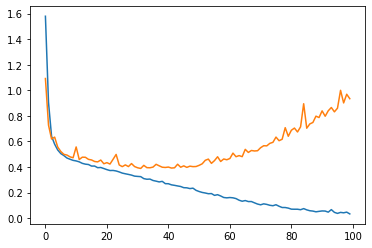

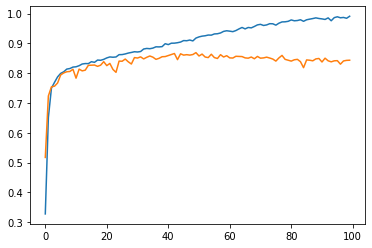

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [53]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

160/160 [==============================] - 0s 2ms/step - loss: 0.8998 - accuracy: 0.8374
loss= 0.8998271226882935
acc= 0.837382435798645


# overfitting 처리

In [54]:
model = keras.Sequential()
model.add(Input(x[0].shape))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())      # <------------------
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())      # <------------------
model.add(Dense(len(failure_name)-1, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                23050     
_________________________________________________________________
batch_normalization (BatchNo (None, 10)               

In [55]:
hist = model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1)

Epoch 1/100
144/144 [==============================] - 1s 6ms/step - loss: 1.1403 - accuracy: 0.6511 - val_loss: 1.7872 - val_accuracy: 0.2635
Epoch 2/100
144/144 [==============================] - 1s 4ms/step - loss: 0.6604 - accuracy: 0.8108 - val_loss: 1.1523 - val_accuracy: 0.5715
Epoch 3/100
144/144 [==============================] - 1s 4ms/step - loss: 0.4932 - accuracy: 0.8366 - val_loss: 2.1883 - val_accuracy: 0.3781
Epoch 4/100
144/144 [==============================] - 1s 4ms/step - loss: 0.4078 - accuracy: 0.8543 - val_loss: 1.0577 - val_accuracy: 0.5269
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8688 - val_loss: 1.1057 - val_accuracy: 0.6107
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 0.3146 - accuracy: 0.8820 - val_loss: 1.4162 - val_accuracy: 0.6430
Epoch 7/100
144/144 [==============================] - 1s 4ms/step - loss: 0.2816 - accuracy: 0.8943 - val_loss: 1.0442 - val_accuracy: 0.6964

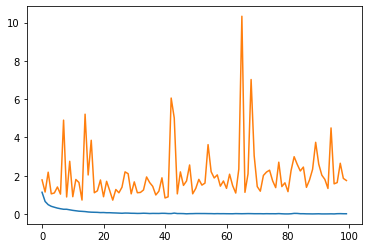

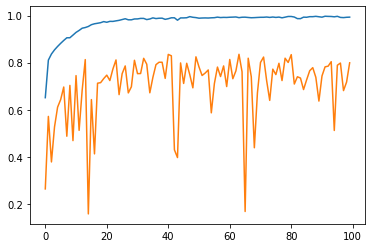

In [56]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [57]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

160/160 [==============================] - 0s 2ms/step - loss: 1.5723 - accuracy: 0.8090
loss= 1.5723209381103516
acc= 0.8089733719825745


# Learning Rate 조정

In [58]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()
model.add(Input(x[0].shape))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(failure_name)-1, activation='softmax'))

optimizer = Adam(lr=0.0001)

# model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                23050     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [59]:
hist = model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1)

Epoch 1/100
144/144 [==============================] - 1s 5ms/step - loss: 1.9320 - accuracy: 0.3582 - val_loss: 1.8103 - val_accuracy: 0.3756
Epoch 2/100
144/144 [==============================] - 1s 4ms/step - loss: 1.7289 - accuracy: 0.3772 - val_loss: 1.6675 - val_accuracy: 0.3810
Epoch 3/100
144/144 [==============================] - 1s 4ms/step - loss: 1.5521 - accuracy: 0.4386 - val_loss: 1.4544 - val_accuracy: 0.5122
Epoch 4/100
144/144 [==============================] - 1s 4ms/step - loss: 1.3503 - accuracy: 0.5157 - val_loss: 1.2956 - val_accuracy: 0.5137
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 1.1863 - accuracy: 0.5282 - val_loss: 1.1179 - val_accuracy: 0.5328
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 1.0119 - accuracy: 0.5853 - val_loss: 0.9422 - val_accuracy: 0.6469
Epoch 7/100
144/144 [==============================] - 1s 4ms/step - loss: 0.8976 - accuracy: 0.6592 - val_loss: 0.8711 - val_accuracy: 0.6567

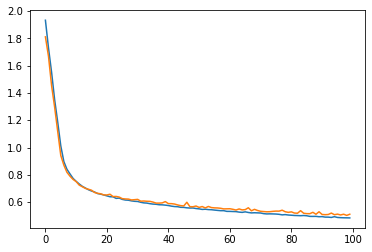

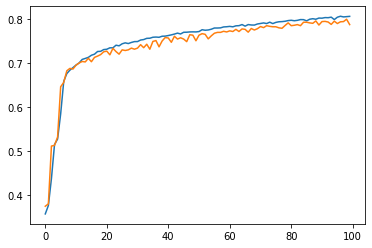

In [60]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [61]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

160/160 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7945
loss= 0.49233266711235046
acc= 0.7944748997688293


In [62]:
hist = model.fit(train_x, train_y, epochs=300, verbose=1, batch_size=128, validation_split=0.1)

Epoch 1/300
144/144 [==============================] - 1s 5ms/step - loss: 0.4835 - accuracy: 0.8073 - val_loss: 0.5065 - val_accuracy: 0.8007
Epoch 2/300
144/144 [==============================] - 1s 4ms/step - loss: 0.4788 - accuracy: 0.8097 - val_loss: 0.5010 - val_accuracy: 0.8026
Epoch 3/300
144/144 [==============================] - 1s 4ms/step - loss: 0.4783 - accuracy: 0.8097 - val_loss: 0.5129 - val_accuracy: 0.7933
Epoch 4/300
144/144 [==============================] - 1s 4ms/step - loss: 0.4786 - accuracy: 0.8106 - val_loss: 0.5141 - val_accuracy: 0.7929
Epoch 5/300
144/144 [==============================] - 1s 4ms/step - loss: 0.4781 - accuracy: 0.8099 - val_loss: 0.5140 - val_accuracy: 0.7943
Epoch 6/300
144/144 [==============================] - 1s 4ms/step - loss: 0.4783 - accuracy: 0.8095 - val_loss: 0.5128 - val_accuracy: 0.7948
Epoch 7/300
144/144 [==============================] - 1s 4ms/step - loss: 0.4728 - accuracy: 0.8122 - val_loss: 0.4982 - val_accuracy: 0.8007

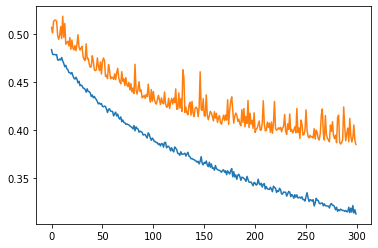

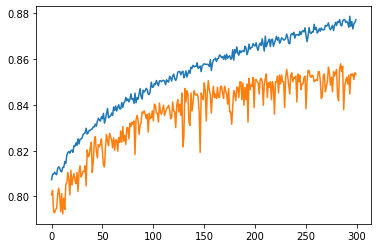

In [63]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [64]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

160/160 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8525
loss= 0.3768453896045685
acc= 0.8524686694145203


# class weight 적용

In [65]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()
model.add(Input(x[0].shape))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(len(failure_name)-1, activation='softmax'))

optimizer = Adam(lr=0.0001)

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                23050     
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

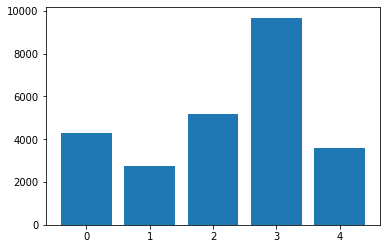

In [66]:
plt.bar(failure_category_count[0], failure_category_count[1])
plt.show()

In [68]:
from sklearn.utils.class_weight import compute_class_weight

class_weight = compute_class_weight('balanced', np.unique(train_y), train_y)
print(class_weight)

class_weight = {i : class_weight[i] for i in range(len(class_weight))}
print(class_weight)

[1.18864629 1.85759782 0.97469563 0.53060429 1.40890269]
{0: 1.188646288209607, 1: 1.8575978161965423, 2: 0.9746956314156123, 3: 0.5306042884990253, 4: 1.4089026915113871}


In [69]:
hist = model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=128, validation_split=0.1, class_weight=class_weight)

Epoch 1/100
144/144 [==============================] - 1s 5ms/step - loss: 1.7905 - accuracy: 0.3771 - val_loss: 1.6524 - val_accuracy: 0.3756
Epoch 2/100
144/144 [==============================] - 1s 4ms/step - loss: 1.6836 - accuracy: 0.3835 - val_loss: 1.5285 - val_accuracy: 0.4021
Epoch 3/100
144/144 [==============================] - 1s 4ms/step - loss: 1.5661 - accuracy: 0.4170 - val_loss: 1.3388 - val_accuracy: 0.4182
Epoch 4/100
144/144 [==============================] - 1s 4ms/step - loss: 1.4179 - accuracy: 0.4827 - val_loss: 1.1649 - val_accuracy: 0.5607
Epoch 5/100
144/144 [==============================] - 1s 4ms/step - loss: 1.2456 - accuracy: 0.5922 - val_loss: 0.9899 - val_accuracy: 0.6185
Epoch 6/100
144/144 [==============================] - 1s 4ms/step - loss: 1.0886 - accuracy: 0.6476 - val_loss: 0.9410 - val_accuracy: 0.5906
Epoch 7/100
144/144 [==============================] - 1s 4ms/step - loss: 0.9785 - accuracy: 0.6611 - val_loss: 0.7828 - val_accuracy: 0.6876

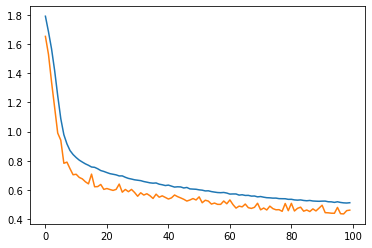

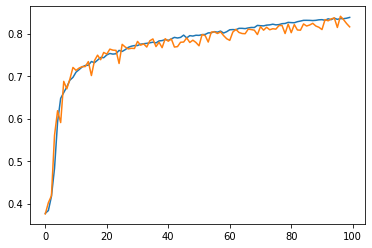

In [70]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [71]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

160/160 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.8274
loss= 0.45224669575691223
acc= 0.8273902535438538


In [72]:
hist = model.fit(train_x, train_y, epochs=300, verbose=1, batch_size=128, validation_split=0.1, class_weight=class_weight)

Epoch 1/300
144/144 [==============================] - 1s 5ms/step - loss: 0.5118 - accuracy: 0.8352 - val_loss: 0.4633 - val_accuracy: 0.8217
Epoch 2/300
144/144 [==============================] - 1s 4ms/step - loss: 0.5083 - accuracy: 0.8385 - val_loss: 0.4506 - val_accuracy: 0.8286
Epoch 3/300
144/144 [==============================] - 1s 4ms/step - loss: 0.5080 - accuracy: 0.8370 - val_loss: 0.4396 - val_accuracy: 0.8281
Epoch 4/300
144/144 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.8395 - val_loss: 0.4487 - val_accuracy: 0.8281
Epoch 5/300
144/144 [==============================] - 1s 4ms/step - loss: 0.5061 - accuracy: 0.8379 - val_loss: 0.4647 - val_accuracy: 0.8144
Epoch 6/300
144/144 [==============================] - 1s 4ms/step - loss: 0.5064 - accuracy: 0.8381 - val_loss: 0.4388 - val_accuracy: 0.8301
Epoch 7/300
144/144 [==============================] - 1s 4ms/step - loss: 0.5036 - accuracy: 0.8386 - val_loss: 0.4586 - val_accuracy: 0.8257

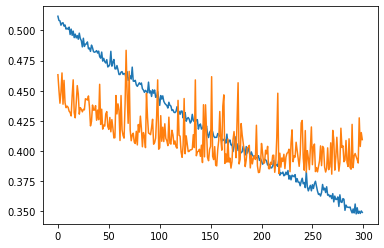

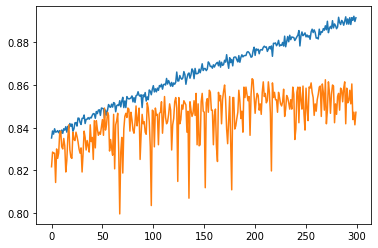

In [73]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [74]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

160/160 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8505
loss= 0.38889724016189575
acc= 0.8505094051361084
